## Predicting sales of specific product type at different supermarket

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((3742, 13), (1248, 12))

In [4]:
train.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,NaN,Cluster 2,Supermarket Type1,4633.97
1,FDR31,CHUKWUDI019,FDR31_CHUKWUDI019,NaN,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
2,FDP16,CHUKWUDI017,FDP16_CHUKWUDI017,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,NaN,Cluster 2,Supermarket Type1,14740.81
3,FDY16,CHUKWUDI027,FDY16_CHUKWUDI027,NaN,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
4,FDY48,CHUKWUDI046,FDY48_CHUKWUDI046,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99


In [5]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Product_Identifier              3742 non-null   object 
 1   Supermarket_Identifier          3742 non-null   object 
 2   Product_Supermarket_Identifier  3742 non-null   object 
 3   Product_Weight                  3141 non-null   float64
 4   Product_Fat_Content             3742 non-null   object 
 5   Product_Shelf_Visibility        3742 non-null   float64
 6   Product_Type                    3742 non-null   object 
 7   Product_Price                   3742 non-null   float64
 8   Supermarket_Opening_Year        3742 non-null   int64  
 9   Supermarket _Size               2616 non-null   object 
 10  Supermarket_Location_Type       3742 non-null   object 
 11  Supermarket_Type                3742 non-null   object 
 12  Product_Supermarket_Sales       37

In [7]:
train.describe(include='all')

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
count,3742,3742,3742,3141.000000,3742,3742.000000,3742,3742.000000,3742.000000,2616,3742,3742,3742.000000
unique,1367,10,3742,NaN,3,NaN,16,NaN,NaN,3,3,4,NaN
top,NCL31,CHUKWUDI017,FDE20_CHUKWUDI046,NaN,Low Fat,NaN,Snack Foods,NaN,NaN,Medium,Cluster 3,Supermarket Type1,NaN
freq,9,461,1,NaN,2272,NaN,563,NaN,NaN,1155,1438,2495,NaN
mean,NaN,NaN,NaN,12.870640,NaN,0.066613,NaN,391.815315,2004.778461,NaN,NaN,NaN,6103.735353
std,NaN,NaN,NaN,4.730432,NaN,0.052951,NaN,120.204222,8.276712,NaN,NaN,NaN,4456.169125
min,NaN,NaN,NaN,4.555000,NaN,0.000000,NaN,78.730000,1992.000000,NaN,NaN,NaN,83.230000
25%,NaN,NaN,NaN,8.630000,NaN,0.026971,NaN,308.392500,1994.000000,NaN,NaN,NaN,2728.120000
50%,NaN,NaN,NaN,12.600000,NaN,0.053517,NaN,393.910000,2006.000000,NaN,NaN,NaN,5374.675000
75%,NaN,NaN,NaN,17.100000,NaN,0.095094,NaN,466.480000,2011.000000,NaN,NaN,NaN,8524.737500


In [8]:
test.describe(include='all')

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type
count,1248,1248,1248,1047.000000,1248,1248.000000,1248,1248.000000,1248.000000,924,1248,1248
unique,815,10,1248,NaN,3,NaN,16,NaN,NaN,3,3,4
top,FDA47,CHUKWUDI049,FDS07_CHUKWUDI017,NaN,Low Fat,NaN,Snack Foods,NaN,NaN,Medium,Cluster 3,Supermarket Type1
freq,5,169,1,NaN,767,NaN,195,NaN,NaN,427,502,809
mean,NaN,NaN,NaN,13.023434,NaN,0.067825,NaN,391.769255,2004.798878,NaN,NaN,NaN
std,NaN,NaN,NaN,4.621107,NaN,0.053390,NaN,116.914230,8.305732,NaN,NaN,NaN
min,NaN,NaN,NaN,4.555000,NaN,0.000000,NaN,84.220000,1992.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,8.985000,NaN,0.028697,NaN,307.700000,1994.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,12.850000,NaN,0.053678,NaN,392.990000,2006.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,17.000000,NaN,0.096293,NaN,459.280000,2011.000000,NaN,NaN,NaN


In [10]:
# Drop all the indetifiers for the train and test set
train.drop(['Product_Identifier', 'Supermarket_Identifier','Product_Supermarket_Identifier'], axis = 1, inplace = True)
test.drop(['Product_Identifier', 'Supermarket_Identifier','Product_Supermarket_Identifier'], axis = 1, inplace = True)

### Missing value treatment

In [11]:
train.isnull().sum()

Product_Weight                601
Product_Fat_Content             0
Product_Shelf_Visibility        0
Product_Type                    0
Product_Price                   0
Supermarket_Opening_Year        0
Supermarket _Size            1126
Supermarket_Location_Type       0
Supermarket_Type                0
Product_Supermarket_Sales       0
dtype: int64

In [12]:
test.isnull().sum()

Product_Weight               201
Product_Fat_Content            0
Product_Shelf_Visibility       0
Product_Type                   0
Product_Price                  0
Supermarket_Opening_Year       0
Supermarket _Size            324
Supermarket_Location_Type      0
Supermarket_Type               0
dtype: int64

In [13]:
train['Product_Weight'].fillna(np.mean(train['Product_Weight']),inplace = True)
test['Product_Weight'].fillna(np.mean(test['Product_Weight']),inplace = True)

Text(0.5, 1.0, 'Supermarket _Size')

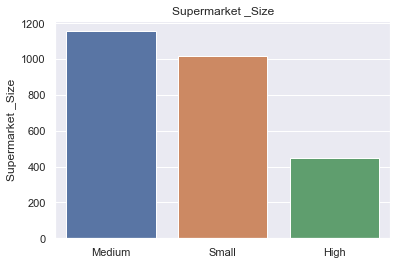

In [16]:
# Check the distribution of the 'Supermarket _Size'
sns.barplot(train['Supermarket _Size'].value_counts().index,train['Supermarket _Size'].value_counts()).set_title('Supermarket _Size')

Text(0.5, 1.0, 'Supermarket _Size')

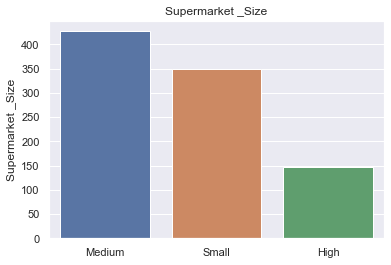

In [17]:
sns.barplot(test['Supermarket _Size'].value_counts().index,test['Supermarket _Size'].value_counts()).set_title('Supermarket _Size')

In [18]:
# Fill all missing value in the 'Supermarket _Size' feature with 'Medium'
train['Supermarket _Size'].fillna("Medium",inplace = True)
test['Supermarket _Size'].fillna("Medium",inplace = True)

In [19]:
train.isnull().sum()

Product_Weight               0
Product_Fat_Content          0
Product_Shelf_Visibility     0
Product_Type                 0
Product_Price                0
Supermarket_Opening_Year     0
Supermarket _Size            0
Supermarket_Location_Type    0
Supermarket_Type             0
Product_Supermarket_Sales    0
dtype: int64

In [20]:
#quick way to separate numeric columns
train.describe().columns

Index(['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Opening_Year', 'Product_Supermarket_Sales'],
      dtype='object')

In [21]:
# look at numeric and categorical values separately 
df_num = train[['Product_Weight', 'Product_Shelf_Visibility', 'Product_Price',
       'Supermarket_Opening_Year', 'Product_Supermarket_Sales']]
df_cat = train[['Product_Fat_Content', 'Product_Type', 'Supermarket _Size', 'Supermarket_Location_Type',                      'Supermarket_Type']]

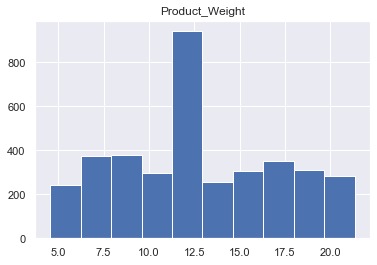

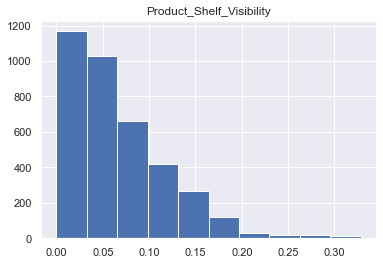

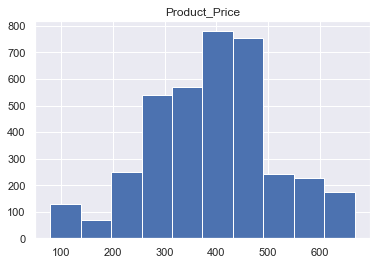

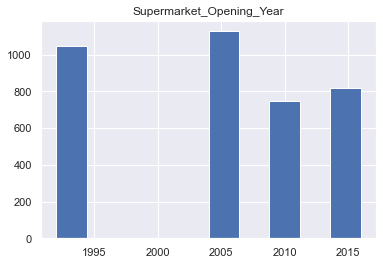

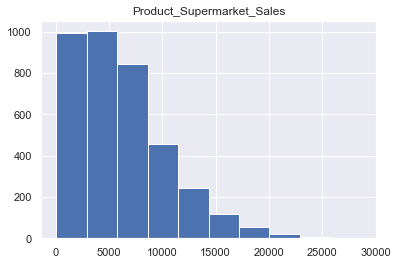

In [22]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [36]:
#print(df_num.corr())
#sns.heatmap(df_num.corr())

### Check for multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = train[['Product_Weight','Product_Shelf_Visibility','Product_Price', 'Supermarket_Opening_Year']]

vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [25]:
# Let's explore the result
vif

,VIF,Features
0,9.837015,Product_Weight
1,2.583876,Product_Shelf_Visibility
2,11.696831,Product_Price
3,21.897789,Supermarket_Opening_Year


In [26]:
# Since Supermarket_Opening_Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if Product_Price seems with a high VIF, too, 
# once 'Supermarket_Opening_Year' is gone that will no longer be the case
train.drop(['Supermarket_Opening_Year'], axis = 1, inplace = True)
test.drop(['Supermarket_Opening_Year'], axis = 1, inplace = True)

## Baseline Model

In [28]:
# CatBoostRegressor model was fitted on the train dataset which had a very high performance
# It was a good choice, because it has the capacity to take care of the categorical features
from catboost import CatBoostRegressor

In [29]:
# The target(s) (dependent variable) is 'Product Supermarket Sales'
targets = train['Product_Supermarket_Sales']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = train.drop(['Product_Supermarket_Sales'],axis=1)

In [30]:
categorical_features_indices = np.where(inputs.dtypes != np.float)[0]
model = CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE', od_type='Iter')
model.fit(inputs, targets, cat_features=categorical_features_indices)

0:	learn: 4240.0340023	total: 102ms	remaining: 5s
1:	learn: 4058.5868052	total: 112ms	remaining: 2.69s
2:	learn: 3901.8501745	total: 118ms	remaining: 1.85s
3:	learn: 3768.0514153	total: 121ms	remaining: 1.4s
4:	learn: 3655.1391819	total: 125ms	remaining: 1.13s
5:	learn: 3553.0356603	total: 128ms	remaining: 941ms
6:	learn: 3473.0875925	total: 131ms	remaining: 807ms
7:	learn: 3398.5623363	total: 135ms	remaining: 709ms
8:	learn: 3335.8063278	total: 139ms	remaining: 632ms
9:	learn: 3283.5543081	total: 142ms	remaining: 568ms
10:	learn: 3238.6211081	total: 145ms	remaining: 514ms
11:	learn: 3194.1661540	total: 149ms	remaining: 471ms
12:	learn: 3160.9244567	total: 152ms	remaining: 433ms
13:	learn: 3132.4436699	total: 156ms	remaining: 400ms
14:	learn: 3102.5611288	total: 159ms	remaining: 370ms
15:	learn: 3079.6412832	total: 163ms	remaining: 346ms
16:	learn: 3060.1572807	total: 167ms	remaining: 324ms
17:	learn: 3043.1919018	total: 170ms	remaining: 302ms
18:	learn: 3028.3691416	total: 173ms	remai

In [31]:
sales_predicted = model.predict(test)

In [33]:
test_id = pd.read_csv('test.csv')
identifier = test_id['Product_Supermarket_Identifier']
identifier

0       FDC15_CHUKWUDI049
1       NCY06_CHUKWUDI018
2       DRB24_CHUKWUDI035
3       NCG54_CHUKWUDI018
4       NCA42_CHUKWUDI017
              ...        
1243    FDW39_CHUKWUDI018
1244    FDB40_CHUKWUDI018
1245    FDX32_CHUKWUDI018
1246    FDX37_CHUKWUDI049
1247    FDZ35_CHUKWUDI049
Name: Product_Supermarket_Identifier, Length: 1248, dtype: object

In [34]:
df_pf = pd.DataFrame(identifier, columns=['Product_Supermarket_Identifier'])
df_pf['Product_Supermarket_Sales'] = sales_predicted
df_pf

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDC15_CHUKWUDI049,6319.828726
1,NCY06_CHUKWUDI018,5121.940901
2,DRB24_CHUKWUDI035,6140.491743
3,NCG54_CHUKWUDI018,6454.846076
4,NCA42_CHUKWUDI017,6412.940900
...,...,...
1243,FDW39_CHUKWUDI018,6785.306120
1244,FDB40_CHUKWUDI018,5281.325929
1245,FDX32_CHUKWUDI018,5281.805375
1246,FDX37_CHUKWUDI049,4346.729146


In [35]:
df_pf.to_csv('iyi_dsn_july_challenge.csv', index=False)